In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [54]:
# Checking the number of mice.
num_mice = merged_df['Mouse ID'].nunique()
num_mice

249

In [55]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [56]:
# Optional: Get all the data for the duplicate mouse ID. 
# First, find the duplicate mice
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Then, get all data for each duplicate mouse
for mouse in duplicate_mice:
    duplicate_data = merged_df.loc[merged_df['Mouse ID'] == mouse]
    print(f'Data for Mouse ID {mouse}:')
    display(duplicate_data)

Data for Mouse ID g989:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop the duplicate rows and create a clean DataFrame
clean_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

# Print the shape of the clean DataFrame to verify the number of rows dropped
print("Shape of original merged DataFrame:", merged_df.shape)
print("Shape of clean DataFrame:", clean_df.shape)

Shape of original merged DataFrame: (1893, 8)
Shape of clean DataFrame: (1888, 8)


In [58]:
# Checking the number of mice in the clean DataFrame.
# Count the number of unique mice in the clean DataFrame
num_unique_mice = clean_df["Mouse ID"].nunique()

# Print the result
print("Number of unique mice in the clean DataFrame:", num_unique_mice)

Number of unique mice in the clean DataFrame: 249


## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the data by drug regimen and calculate the summary statistics
summary_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."
})

# Print the summary statistics table
summary_stats




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Use the agg method with a dictionary of column names and functions to generate the summary statistics
summary_stats = clean_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

# Flatten the hierarchical column index
summary_stats.columns = summary_stats.columns.map("_".join)

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    "Tumor Volume (mm3)_mean": "Mean Tumor Volume",
    "Tumor Volume (mm3)_median": "Median Tumor Volume",
    "Tumor Volume (mm3)_var": "Tumor Volume Variance",
    "Tumor Volume (mm3)_std": "Tumor Volume Std. Dev.",
    "Tumor Volume (mm3)_sem": "Tumor Volume Std. Err."
})

# Print the summary statistics table
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

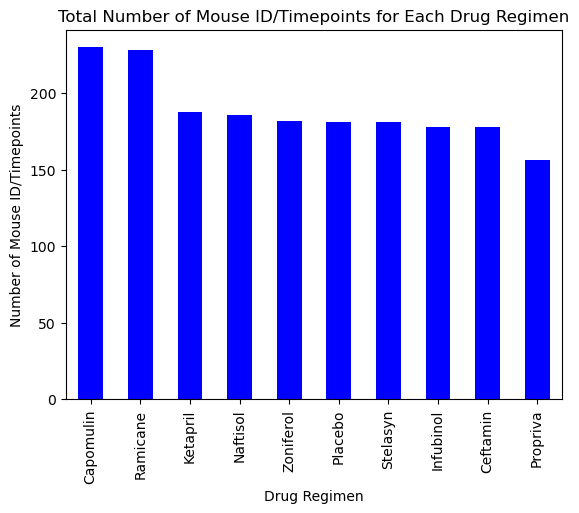

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create a dataframe that counts the number of Mouse ID/Timepoints for each Drug Regimen
drug_counts = clean_df["Drug Regimen"].value_counts()

# Create a bar plot using the Pandas plot() function
drug_counts.plot(kind="bar", color="blue")

# Set the title and labels
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")

# Display the plot
plt.show()

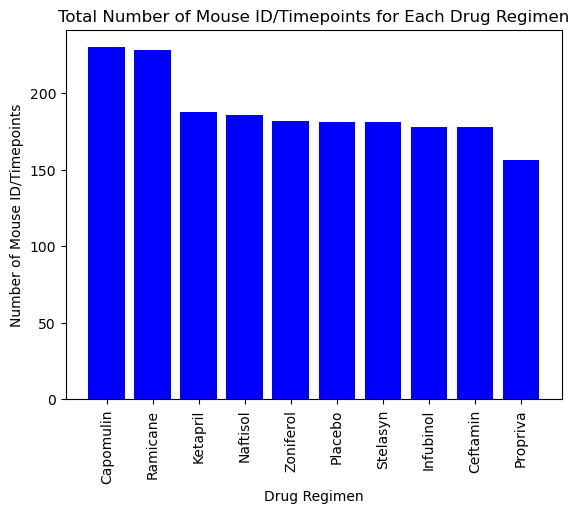

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create a dataframe that counts the number of Mouse ID/Timepoints for each Drug Regimen
drug_counts = clean_df["Drug Regimen"].value_counts()

# Create a bar plot using the Pyplot bar() function
plt.bar(drug_counts.index, drug_counts.values, color="blue")

# Set the title and labels
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


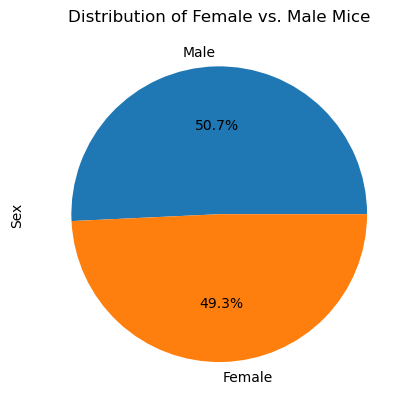

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Create a dataframe that counts the number of female and male mice
gender_counts = clean_df["Sex"].value_counts()

# Create a pie plot using the Pandas plot() function
gender_counts.plot(kind="pie", y="Sex", autopct="%1.1f%%")

# Set the title
plt.title("Distribution of Female vs. Male Mice")

# Display the plot
plt.show()



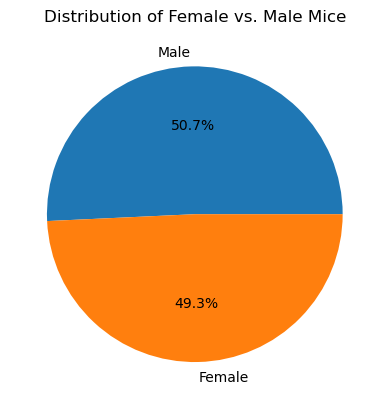

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create a dataframe that counts the number of female and male mice
gender_counts = clean_df["Sex"].value_counts()

# Create a pie plot using the pyplot pie() function
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")

# Set the title
plt.title("Distribution of Female vs. Male Mice")

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Get the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Create a new dataframe that contains the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge the max_timepoint_df dataframe with the clean_df dataframe on both "Mouse ID" and "Timepoint" columns
merged_df = pd.merge(clean_df, max_timepoint_df, on=["Mouse ID", "Timepoint"])

# Filter the merged_df dataframe to include only the four treatment regimens of interest: Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") | 
                                 (merged_df["Drug Regimen"] == "Ramicane") | 
                                 (merged_df["Drug Regimen"] == "Infubinol") | 
                                 (merged_df["Drug Regimen"] == "Ceftamin")]

# Group the four_regimens_df dataframe by "Mouse ID" and calculate the mean tumor volume for each mouse
final_tumor_volume = four_regimens_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Create a dataframe that contains the final tumor volume for each mouse
final_tumor_volume_df = pd.DataFrame(final_tumor_volume)

# Rename the "Tumor Volume (mm3)" column to "Final Tumor Volume (mm3)"
final_tumor_volume_df = final_tumor_volume_df.rename(columns={"Tumor Volume (mm3)": "Final Tumor Volume (mm3)"})

# Print the final_tumor_volume_df dataframe
final_tumor_volume_df



,Final Tumor Volume (mm3)
Mouse ID,
a203,67.973419
a251,65.525743
a275,62.999356
a411,38.407618
a444,43.047543
...,...
y769,68.594745
y793,31.896238
y865,64.729837


In [66]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Loop through each treatment
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == treatment].groupby("Mouse ID").agg({"Timepoint": "max", "Tumor Volume (mm3)": "last"})
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = final_tumor_vol["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol["Tumor Volume (mm3)"] < lower_bound) | (final_tumor_vol["Tumor Volume (mm3)"] > upper_bound)]
    
    # Append the tumor volume data to the list
    tumor_vols.append(final_tumor_vol["Tumor Volume (mm3)"])
    
    # Print summary statistics and outliers
    print(f"{treatment} Regimen")
    print(f"Number of Mice: {len(final_tumor_vol)}")
    print(f"Median Tumor Volume: {quartiles[0.5]}")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}\n")
    



Capomulin Regimen
Number of Mice: 25
Median Tumor Volume: 38.1251644
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Number of Outliers: 0

Ramicane Regimen
Number of Mice: 25
Median Tumor Volume: 36.56165229
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Number of Outliers: 0

Infubinol Regimen
Number of Mice: 25
Median Tumor Volume: 60.16518046
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Number of Outliers: 1

Ceftamin Regimen
Number of Mice: 25
Median Tumor Volume: 59.85195552
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Number of Outliers: 0



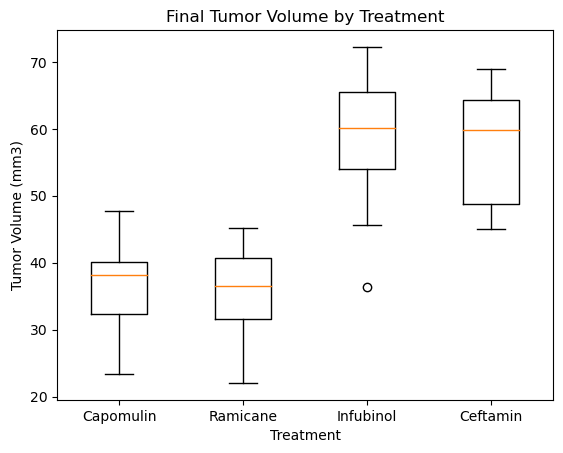

In [67]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a list of the four treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each treatment
tumor_vol_data = []

# Iterate through each treatment and extract the tumor volume data
for treatment in treatments:
    # Create a subset dataframe for each treatment
    treatment_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    # Get the tumor volume data for the last timepoint for each mouse
    tumor_vol = treatment_df.groupby('Mouse ID').agg({'Timepoint': 'max', 'Tumor Volume (mm3)': 'last'})['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    tumor_vol_data.append(list(tumor_vol))

# Create a box plot of the tumor volume data for each treatment
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatments)

# Set the title and axis labels
ax.set_title('Final Tumor Volume by Treatment')
ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

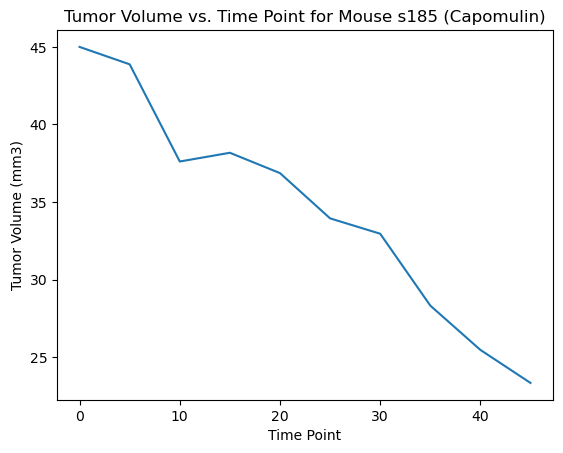

In [68]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for mice treated with Capomulin
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Choose a single mouse (e.g. mouse ID s185) and extract its tumor volume data
mouse_id = "s185"
mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == mouse_id, ["Timepoint", "Tumor Volume (mm3)"]]

# Create a line plot of tumor volume vs. time point for the chosen mouse
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

# Set the plot title and axis labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()


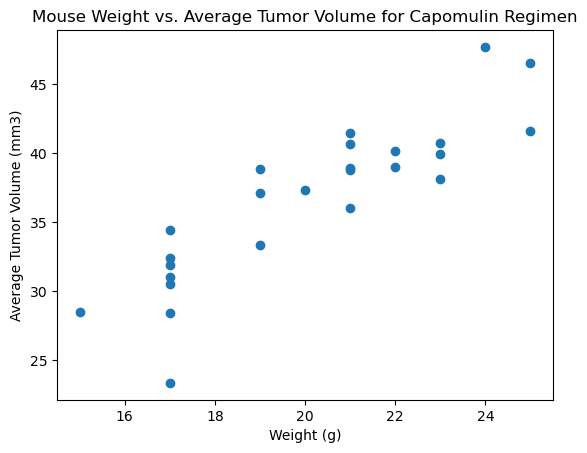

In [69]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for mice treated with Capomulin
capomulin_data = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID and calculate the mean tumor volume and weight for each mouse
capomulin_grouped = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

# Create a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])

# Set the plot title and axis labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.88


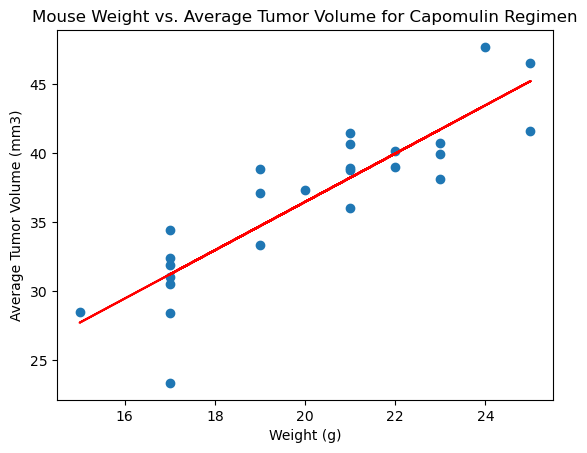

In [70]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Import the necessary libraries
from scipy.stats import linregress

# Get the weight and tumor volume data
x = capomulin_grouped["Weight (g)"]
y = capomulin_grouped["Tumor Volume (mm3)"]

# Calculate the correlation coefficient
r, p_value = stats.pearsonr(x, y)
print(f"Correlation Coefficient: {r:.2f}")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the regression line data
regress_values = x * slope + intercept

# Create the scatter plot of the data and the regression line
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")

# Set the plot title and axis labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()
